# Understanding model optimization

## `[note-1]` Why optimization is hard

* Simultaneously optimizing 1000s of parameters with complex relationships.

* Updates may not improve the model meaningfully.

* Updates could be too small (if the learning rate is low) or too large (if the learning rate is high).

## `[code-1]` Stochastic gradient descent

In [7]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD


def data_preparation(data):
    df = data.reindex(columns=[
        'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST',
        'SHOT_RESULT'
    ])
    df['SHOT_CLOCK'] = df['SHOT_CLOCK'].fillna(0)
    df['SHOT_RESULT'].replace('missed', 0, inplace=True)
    df['SHOT_RESULT'].replace('made', 1, inplace=True)
    df.columns = df.columns.str.lower()
    return df


data = pd.read_csv('../Datasets/1. Basketball shot log.csv')
df = data_preparation(data)

predictors = df.drop(['shot_result'], axis=1).to_numpy()
n_cols = predictors.shape[1]
target = to_categorical(df.shot_result)
input_shape = (n_cols, )


def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return (model)


lr_to_test = [.000001, 0.01, 1]

# loop over learning rates
for lr in lr_to_test:
    model = get_new_model()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    model.fit(predictors, target)

4003/4003 [==============================] - 9s 2ms/step - loss: nan


## `[note-2]` The dying neuron problem

![The dying neuron problem](../Figures/1.%20The%20dying%20neuron%20problem.jpg)

## `[note-3]` Vanishing gradients

* It occurs when many layers have very small slopes (*e.g., due to being on at part of tanh curve*).

* In deep networks, updates to backpropagation were close to 0.

![Vanishing gradients](../Figures/2.%20Vanishing%20gradient.jpg)

## `[quiz-1]` Diagnosing optimization problems

* Which of the following could prevent a model from showing an improved loss in its first few epochs?

    $\Box$ Learning rate too low.

    $\Box$ Learning rate too high.

    $\Box$ Poor choice of the activation function.

    $\boxtimes$ All of the above.

## `[task-1]` Changing optimization parameters

$\blacktriangleright$ **Package pre-loading**

In [ ]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

$\blacktriangleright$ **Data pre-loading**

In [ ]:
df = pd.read_csv('../Datasets/2. Titanic.csv')

df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)

predictors = df.drop(['survived'], axis=1).to_numpy()
n_cols = predictors.shape[1]
target = to_categorical(df.survived)
input_shape = (n_cols, )

$\blacktriangleright$ **Code pre-loading**

In [ ]:
def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return (model)

$\blacktriangleright$ **Task practice**

In [ ]:
# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n' % lr)

    # Build new model to test, unaffected by previous models
    model = get_new_model()

    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')

    # Fit the model
    model.fit(predictors, target)

# Model validation

## `[note-1]` Validation in deep learning

* Commonly use validation split rather than cross-validation.

* Deep learning is widely used on large datasets.

* A single validation score is based on a large amount of data and is reliable.

* Repeated training from cross-validation would take a long time.

## `[code-1]` Model validation

In [ ]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


def data_preparation(data):
    df = df.reindex(columns=[
        'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST',
        'SHOT_RESULT'
    ])
    df['SHOT_CLOCK'] = df['SHOT_CLOCK'].fillna(0)
    df['SHOT_RESULT'].replace('missed', 0, inplace=True)
    df['SHOT_RESULT'].replace('made', 1, inplace=True)
    df.columns = df.columns.str.lower()
    return df


def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return (model)


data = pd.read_csv('../Datasets/1. Basketball shot log.csv')
df = data_preparation(data)
predictors = df.drop(['shot_result'], axis=1).to_numpy()
n_cols = predictors.shape[1]
input_shape = (n_cols, )
target = to_categorical(df.shot_result)
model = get_new_model()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(predictors, target, validation_split=0.3)

## `[code-2]` Early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors,
          target,
          validation_split=0.3,
          epochs=20,
          callbacks=[early_stopping_monitor])

## `[note-2]` Experimentation

* Experiment with different architectures.

* More layers.

* Fewer layers.

* Layers with more nodes.

* Layers with fewer nodes.

* Creating a great model requires experimentation.

## `[task-1]` Evaluating model accuracy on a validation dataset

$\blacktriangleright$ **Package pre-loading**

In [21]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

$\blacktriangleright$ **Data pre-loading**

In [22]:
df = pd.read_csv('../Datasets/2. Titanic.csv')

df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)

predictors = df.drop(['survived'], axis=1).to_numpy()
n_cols = predictors.shape[1]
input_shape = (n_cols, )
target = to_categorical(df.survived)

$\blacktriangleright$ **Task practice**

In [23]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

20/20 [==============================] - 2s 38ms/step - loss: 1.6408 - accuracy: 0.5309 - val_loss: 0.5325 - val_accuracy: 0.7388


## `[task-2]` Early stopping: optimizing the optimization

$\blacktriangleright$ **Task practice**

In [19]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors,
          target,
          validation_split=0.3,
          epochs=30,
          callbacks=[early_stopping_monitor])

Epoch 1/30
2802/2802 [==============================] - 11s 4ms/step - loss: 0.6641 - accuracy: 0.6072 - val_loss: 0.6531 - val_accuracy: 0.6171
Epoch 2/30
2802/2802 [==============================] - 10s 4ms/step - loss: 0.6548 - accuracy: 0.6186 - val_loss: 0.6546 - val_accuracy: 0.6185
Epoch 3/30
2802/2802 [==============================] - 9s 3ms/step - loss: 0.6517 - accuracy: 0.6191 - val_loss: 0.6497 - val_accuracy: 0.6190
Epoch 4/30
2802/2802 [==============================] - 12s 4ms/step - loss: 0.6514 - accuracy: 0.6199 - val_loss: 0.6506 - val_accuracy: 0.6180
Epoch 5/30
2802/2802 [==============================] - 12s 4ms/step - loss: 0.6523 - accuracy: 0.6178 - val_loss: 0.6496 - val_accuracy: 0.6182
Epoch 6/30
2802/2802 [==============================] - 10s 4ms/step - loss: 0.6497 - accuracy: 0.6208 - val_loss: 0.6491 - val_accuracy: 0.6180
Epoch 7/30
2802/2802 [==============================] - 9s 3ms/step - loss: 0.6495 - accuracy: 0.6205 - val_loss: 0.6497 - val_accu

## `[task-3]` Experimenting with wider networks

$\blacktriangleright$ **Package pre-loading**

In [8]:
import matplotlib.pyplot as plt

$\blacktriangleright$ **Code pre-loading**

In [25]:
def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=input_shape))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


model_1 = get_new_model()

$\blacktriangleright$ **Task practice**

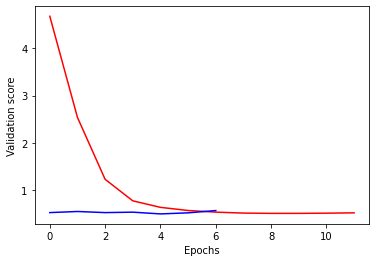

In [26]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors,
                               target,
                               epochs=15,
                               validation_split=0.2,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors,
                               target,
                               epochs=15,
                               validation_split=0.2,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r',
         model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

## 

$\blacktriangleright$ **Code pre-loading**

In [ ]:
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

$\blacktriangleright$ **Network layers adding practice**

In [ ]:
# The input shape to use in the first hidden layer
input_shape = (n_cols, )

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors,
                               target,
                               epochs=20,
                               validation_split=0.4,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors,
                               target,
                               epochs=20,
                               validation_split=0.4,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r',
         model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

# Thinking about model capacity

## What is the connection between overfitting and model capacity?

![Overfitting](ref5.%20Overfitting.jpg)

## What is a good workflow for optimizing model capacity?

* Start with a small network.

* Gradually increase capacity.

* Keep increasing capacity until the validation score is no longer improving.

## How do sequential experiments function?

![Sequential experiments](ref6.%20Sequential%20experiments.jpg)

## Practice question for experimenting with model structures:

* Run an experiment to compare two identical networks except that the 2nd network had an extra hidden layer. It could be seen that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?

    $\Box$ Try a new network with fewer layers than anything you have tried yet.
    
    $\boxtimes$ Use more units in each hidden layer.
    
    $\Box$ Use fewer units in each hidden layer.

# Stepping up to images

## How to recognize handwritten digits?

* The MNIST dataset.

* $28$ x $28$ grid flattened to $784$ values for each image.

* Value in each part of the array denotes the darkness of that pixel.

![Recognizing handwritten digits](ref7.%20Recognizing%20handwritten%20digits.jpg)

## Practice exercises for model validation:

$\blacktriangleright$ **Package pre-loading**

In [2]:
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

ImportError: cannot import name 'Dense' from 'keras.layers' (unknown location)

$\blacktriangleright$ **Data pre-loading**

In [3]:
df = pd.read_csv('ref8. MNIST.csv', header=None)
X = df.iloc[:, 1:].to_numpy()
y = to_categorical(df.iloc[:, 0])

FileNotFoundError: [Errno 2] No such file or directory: 'ref8. MNIST.csv'

$\blacktriangleright$ **Evaluating model accuracy on validation dataset practice**

In [4]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784, )))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3)

NameError: name 'X' is not defined

# Final thoughts

## What are the next steps?

* Start with standard prediction problems on tables of numbers.

* Images (with convolutional neural networks) are common next steps.

* keras.io for excellent documentation.

* The graphical processing unit (GPU) provides dramatic speedups in model training times.

* Need a CUDA compatible GPU.

* Here is a [blog post](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws) that explains how to training on using GPUs in the cloud.